# Problem statement


The data from ISLR shows the sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

What is the relationship between each advertising channel (TV,Radio,Newspaper) and sales? Also using the model, find the sales for  USD 150000 for TV, USD 380000 for radio and USD 20000 for newspaper.

In [3]:
#import the required modules/libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load the dataframe from the csv file
df = pd.read_csv("Advertising.csv")

In [5]:
#chcek the first few rows of the dataframe
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


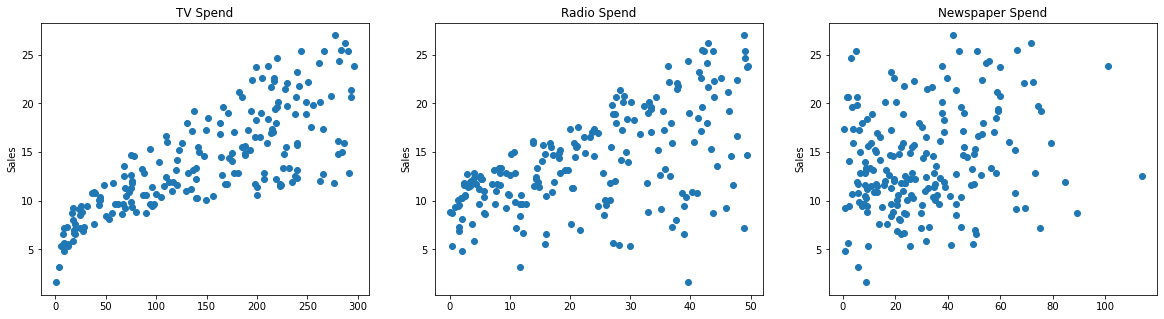

In [15]:
#plotting each feature separately against the target
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))
axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")

plt.tight_layout
plt.show()

<b>Interpretation of the scatter plots</b>

We can clearly see that TV and Radio seem to have a postive correlation with sales. However, looking at Newspaper we can say that it may not be having a strong relation with sale units.

Just by looking at the scatter plot, it may seem that TV spend may have a stronger relation than radio on sales, but we will have to verify that below.

### Train | Test Split using Skicit Learn

In [12]:
#getting the features matrix 'X'
X = df.drop('sales', axis = 1)

In [13]:
#getting the target matrix 'y'
y= df['sales']

In [17]:
#importing train test split from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
test_predictions = model.predict(X_test)

### Calculate Performance on Test Set using Metrics

We use the below metrics for performance evaluation for our regression model:
Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
 
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
 

In [23]:
#checking accuracy of the regression models
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [57]:
y_mean = np.mean(df['sales'])
print('y_mean, MAE, RMSE: ', y_mean, MAE, RMSE)
print(f'Percetage MAE:  {round((MAE/y_mean)*100,0)} %')
print(f'Percetage RMSE:  {round((RMSE/y_mean)*100,0)} %')

y_mean, MAE, RMSE:  14.022500000000003 1.2137457736144805 1.5161519375993877
Percetage MAE:  9.0 %
Percetage RMSE:  11.0 %


<b>Interpretation of metrics</b>

The mean of the sales (y) comes out to be around 14 and the MAE and RMSE values are around 10% of the mean, which for our context can be considered fair.

### Plotting Residuals

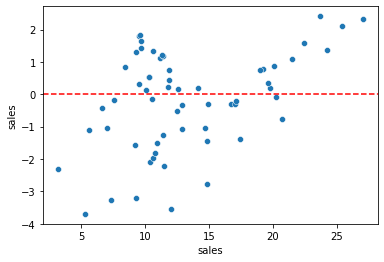

In [36]:
#plotting the residual errors vs y_test
test_residuals = y_test - test_predictions
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', linestyle='--')

<b>Interpretation of residual plot</b>

The residual plot follows a random distribution around the zero residual line, thus we can say that linear regression model is apt for our dataset. In case the distribution of our residuals were ordered, linear regression model used by us would not have been a correct choice.


### Retraining Model on Full Data

In [38]:
#We use our regression model for all rows of dataframe
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [39]:
y_hat = final_model.predict(X)

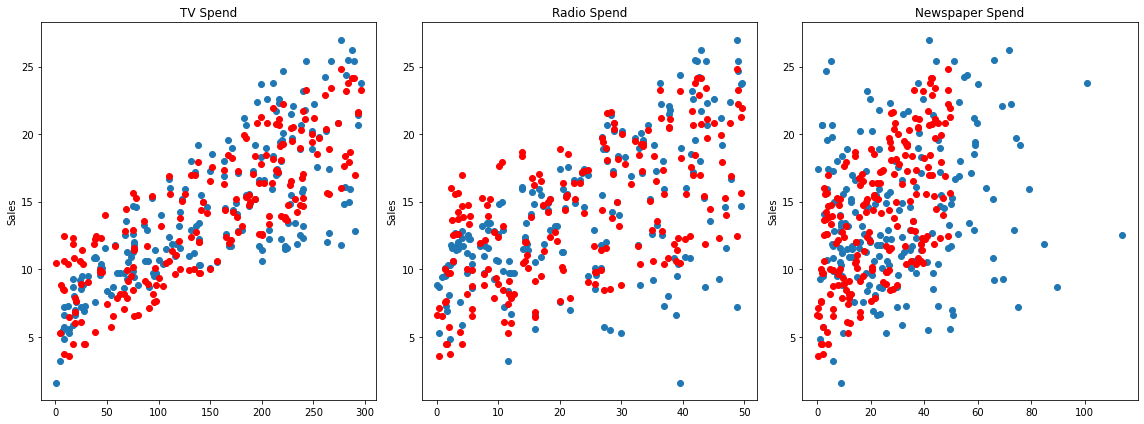

In [40]:
#We check the actual vs estimated values of sales for each of the features
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

### Coefficients

In [41]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [46]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])

In [47]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


<b>Interpreting the coefficients</b>

<b> 1. Feature 'TV'</b>

Holding all other features fixed, a 1 unit (A thousand dollars) increase in TV Spend is associated with an increase in sales of  0.045 "sales units", in this case 1000s of units. 

<b> 2. Feature 'Radio'</b>

Holding all other features fixed, a 1 unit (A thousand dollars) increase in Radio Spend is associated with an increase in sales of 0.188 "sales units", in this case 1000s of units.

<b> 3. Feature 'Newspaper'</b>

Holding all other features fixed, a 1 unit (A thousand dollars) increase in Newspaper Spend is associated with a decrease in sales of 0.001 "sales units", in this case 1000s of units.

Thus, the preliminary assumption from the scatterplot that TV spends have a stronger relation than radio does not hold true.

### Prediction on New Data

As per the question, we need to estimate the increase in the units of sales with spending 150k for TV, 380k for Radio and 20k for Newspaper.

In [50]:
new_spends = [[149,22,12]]

In [51]:
final_model.predict(new_spends)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

In [54]:
print(f"By spending 150k for TV, 380k for Radio and 20k for Newspaper, we can expect to sell {round(final_model.predict(new_spends)[0]*1000,0)} units.")

By spending 150k for TV, 380k for Radio and 20k for Newspaper, we can expect to sell 13893.0 units.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
